# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

## Noms du QUADRINÔME:

- SI MOHAMMED Cherif 181831018892
- HAMMAZ Massinissa 181831015896
- SADOUDI Brahim 181831013058
- SADADOU Mohamed 181833012802

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor
import time

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=np.double)
print("Le representation des donnees: ",type(data.shape),"\n")

print("Un un échantillon du dataset:\n",data[:5])

Le representation des donnees:  <class 'tuple'> 

Un un échantillon du dataset:
 [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print(X.shape)
y = data[:, 1]
y.shape

(97, 2)


(97,)

Text(0, 0.5, 'Bénéfice x1000')

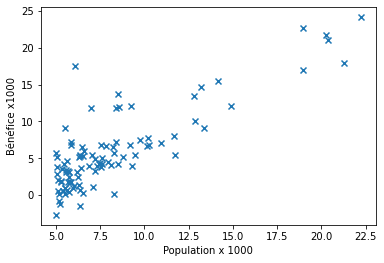

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
def Hypothese(x, theta):
    return (x*theta[1]) + theta[0]


In [6]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    somme = 0
    
    for i in range(X.shape[0]):
        
        h = Hypothese(X[i,1],theta)
        
        somme += (h - y[i])**2
        
    return (somme)/(2*len(X))
debut = time.time()
print("Couts:",computeCostNonVect(X,y,np.zeros((2,1))))
fin = time.time()
print(f"temps d'execution sans vectorisation:{fin-debut}")

Couts: [32.07273388]
temps d'execution sans vectorisation:0.003741025924682617


In [7]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    
    tab_h = X.dot(theta)
    
    tab_h = np.transpose(tab_h)

    return  (((tab_h - y)**2).sum())/(2*len(y))

debut_ = time.time()
print("Couts:",computeCost(X,y,np.zeros((2,1))))
fin_ = time.time()
print(f"temps d'execution avec vectorisation:{fin_-debut_}")

Couts: 32.072733877455676
temps d'execution avec vectorisation:0.00026297569274902344


On remarque que avec le vectorisation on a un temps d'execution inferieur que le temps d'execution avec vectorisation

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescent(X, y, theta, alpha=0.01, iterations=150):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    i = 0
    
    temp_theta = np.zeros((theta.shape))
    
    couts_history, theta_history = [],[]
    
    theta1 = theta
    
    while (iterations>i):
        
        tab_h = X.dot(theta1)
        
        tab_h = tab_h.reshape(len(y))
       
        temp_theta[0] = theta1[0] - alpha*(((tab_h - y).sum())/len(y))
        
        temp_theta[1] = theta1[1] - alpha*((((tab_h - y)*X[:,1]).sum())/(len(y)))
        
        """if(theta1 == temp_theta).all(): #Arret en cas d'arriver au min 
            theta1 = temp_theta
            break
        """
        theta1 = temp_theta
        
        
        couts_history.append(computeCost(X,y,temp_theta))
        
        theta_history.append([theta1[0][0],theta1[1][0]])
        
        i+=1

    return theta1, couts_history, theta_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [9]:
theta = np.array([[-5],[1]]) #theta0 = -1 theta1 = -1 

Apres plusieurs tests on a remaquer que avec cette configuration initial de theta on arrive a obtenir des meilleurs resultats

Calculer le cout initial

In [10]:
initialCost=computeCost(X, y, theta)

Appel de la fonction de calcul du gradient

[[-3.96750307]
 [ 1.20023892]]


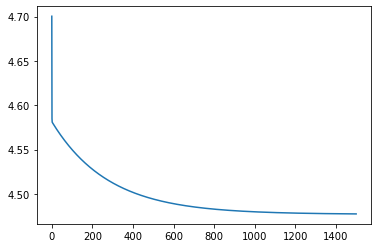

In [11]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta, couts_history, theta_history = gradientDescent(X, y, theta, alpha, iterations);
print(theta)
plt.plot([i for i in range(len(couts_history))],couts_history)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

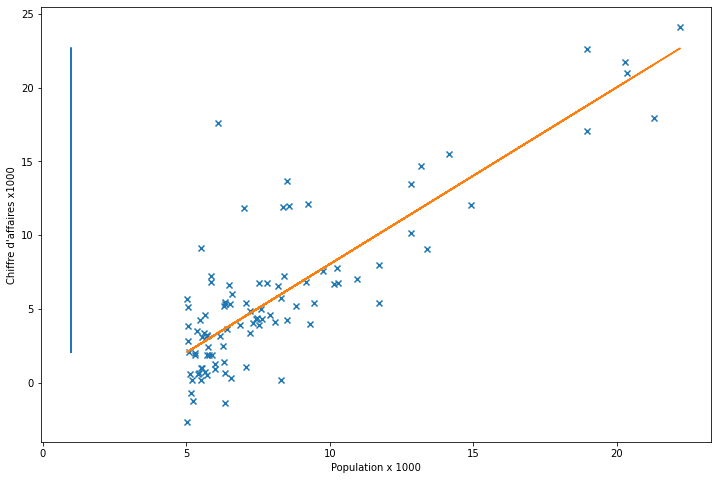

In [12]:
y_pred=np.matmul(X,theta)
plt.figure(figsize=(12,8))
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

## Test avec le model Sklearn.SGDRegressor 

In [13]:



model = SGDRegressor(alpha=0.01,max_iter=1500)
model.fit(X,y)
model.coef_

array([-1.32211302,  0.96949822])

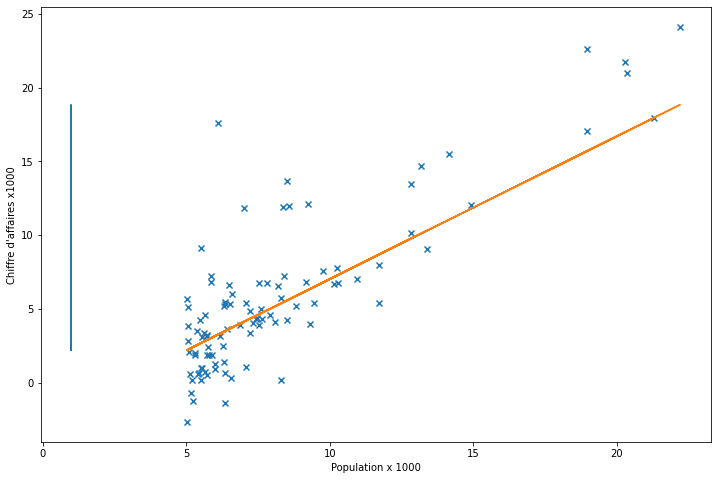

In [14]:
y_pred=model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [15]:
x = np.array(theta_history)[:,0]
y = np.array(theta_history)[:,1]
z = np.array(couts_history).reshape((1500,1))
#couts_history

In [16]:
%matplotlib inline

/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


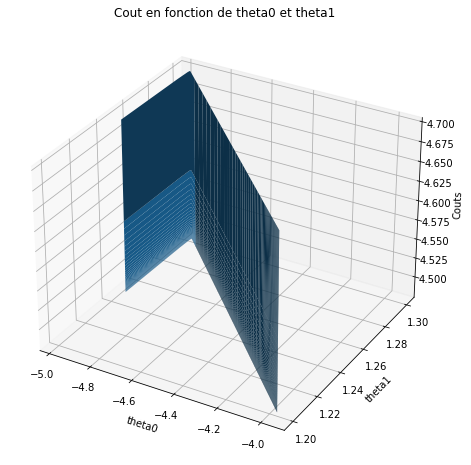

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d') 
ax.plot_surface(x, y,z,  linewidth=0) 
plt.title("Cout en fonction de theta0 et theta1")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Couts')

plt.show()

Prédire des valeurs de y

In [18]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.23333314])

In [19]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.43416935])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [20]:
# données
dataMulti = pd.read_csv('dataMulti.csv', delimiter=',')
dataMulti.shape

(46, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [21]:
# d'abord créer X et y

dataMulti.columns = ["Supérficie","Nbr chambres","Prix"]

dataMulti.head()

df = pd.DataFrame({"A":np.ones(dataMulti.shape[0])}) #Ajouter le 1 pour effectuer la multiplication
y_multi = dataMulti.get(["Prix"])
x_multi = pd.concat([df,dataMulti.get(["Supérficie","Nbr chambres"])],axis=1)

In [22]:
print(x_multi.shape)
x_multi.head() #afficher les 5 1eres lignes

(46, 3)


,A,Supérficie,Nbr chambres
0,1.0,1600,3
1,1.0,2400,3
2,1.0,1416,2
3,1.0,3000,4
4,1.0,1985,4


In [23]:
print(y_multi.shape)
y_multi.head() #afficher les 5 1eres lignes

(46, 1)


,Prix
0,329900.0
1,369000.0
2,232000.0
3,539900.0
4,299900.0


### redéfinissez vos fonctions de coût si cela est necessaire


In [24]:
def Hypothes_multi(x,theta):
    return x.dot(theta)

In [25]:
def coutFn(X,y,theta):
    
    somme = 0
    
    h = 0
    for i in range(len(X)):
        
        for j in range(theta.shape[0]):
            
            h += theta[j,0]*X[i,j] 
            
        somme += (h - y[i])**2
        
        h = 0
    
    return (somme)/(2*len(X))

theta_ = np.zeros((3,1))
coutFn(x_multi.to_numpy(),y_multi.to_numpy(),theta_)


array([6.52792288e+10])

Mise à l'échelle des données

In [26]:
#def normalisation(dataframe):
x_multi_normal = pd.DataFrame(columns=["A","Supérficie","Nbr chambres"])
y_multi_normal = pd.DataFrame(columns=["Prix"])
x_multi_normal["A"] = x_multi["A"]
x_multi_normal["Supérficie"] =  (x_multi["Supérficie"] - (max(x_multi["Supérficie"])//2)) / max(x_multi["Supérficie"])
x_multi_normal["Nbr chambres"] = (x_multi["Nbr chambres"] - (max(x_multi["Nbr chambres"])//2)) / max(x_multi["Nbr chambres"])

y_multi_normal["Prix"] = (y_multi["Prix"] - (max(y_multi["Prix"])//2)) / max(y_multi["Prix"])

print(x_multi_normal.shape)

(46, 3)


Normalisation des données en moyenne = 0

In [27]:
x_multi_normal.head()

,A,Supérficie,Nbr chambres
0,1.0,-0.142698,0.2
1,1.0,0.035954,0.2
2,1.0,-0.183787,0.0
3,1.0,0.169942,0.4
4,1.0,-0.056722,0.4


In [28]:
y_multi_normal.head()

,Prix
0,-0.028647
1,0.027218
2,-0.168524
3,0.271396
4,-0.071510


Appliquer la descente du gradient à plusieurs variables

In [29]:
def gradientDescentMulti(X, y, theta, alpha=0.01, iterations=1500):
    
    temp_theta = np.zeros(theta.shape,dtype=np.double)
    
    couts_history, theta_history = [],[]
    
    theta1 = theta
    
    for i in range(iterations):
        
        tab_h = X.dot(theta1)
        
        tab_h = tab_h.reshape(len(y))
        
        temp =  (tab_h - y)
        for j in range(theta.shape[0]):
            
            temp_theta[j] = theta1[j] - alpha*(((temp*X[:,j]).sum())/(len(y)))
        """
        if(theta1 == temp_theta).all(): #Arret en cas d'arriver au min 
            theta1 = temp_theta
            break
        """
        theta1 = temp_theta
        
        couts_history.append(coutFn(X,y,temp_theta))
        
        theta_history.append(theta1)
        
        

    return theta1, couts_history, theta_history




Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

- avec les donnees originales

/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


Temps dexecution sans remise a l'echelle: 0.574700117111206


Text(0, 0.5, 'Le couts')

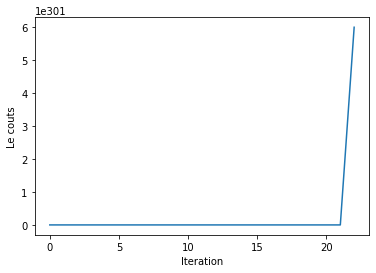

In [30]:
debut1 = time.time()
theta_1,couts_h1,theta_h1 = gradientDescentMulti(x_multi.to_numpy(),y_multi.to_numpy(),theta_)
fin1 = time.time()
print("Temps dexecution sans remise a l'echelle:",(fin1-debut1))
plt.plot(couts_h1)
plt.xlabel("Iteration")
plt.ylabel("Le couts")

- Avec les donnees mises a l'echelles -1< x < 1 . (moyenne == 0) 

Temps dexecution avec remise a l'echelle: 0.4912073612213135


Text(0, 0.5, 'Le couts')

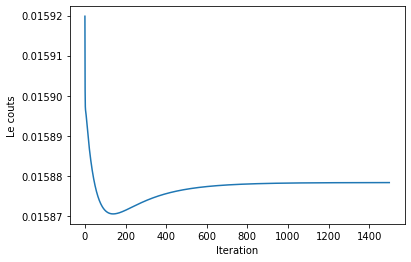

In [31]:
debut2 = time.time()
theta_2,couts_h2,theta_h2 = gradientDescentMulti(x_multi_normal.to_numpy(),y_multi_normal.to_numpy(),theta_)
fin2 = time.time()
print("Temps dexecution avec remise a l'echelle:",(fin2-debut2))
plt.plot(couts_h2)
plt.xlabel("Iteration")
plt.ylabel("Le couts")

On remaque que dans notre cas que l'algoritheme du gradient converge vers le cout minimume avec des donnees mises a l'echelle


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Le dataset et tres petit on doit avoir plus de donnees
- Ajouter d'autre caracteristique 

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


# bonne chance